In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_folder = "data/"
data_2d = pd.read_csv(data_folder + "data_2d.csv")
data_2d = data_2d.drop(data_2d.columns[0], axis=1)
mnist = pd.read_csv(data_folder + "mnist.csv")

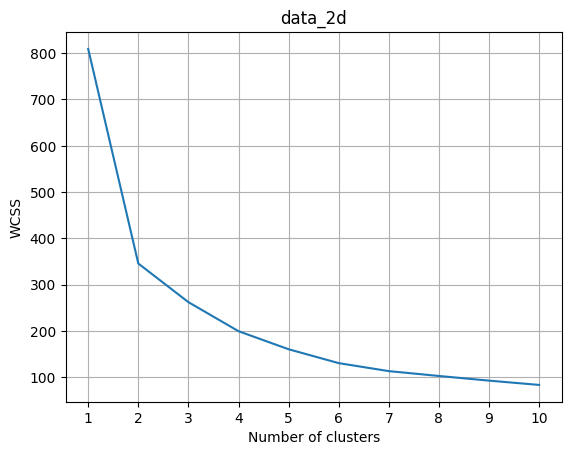

In [3]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('data_2d')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\oishe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


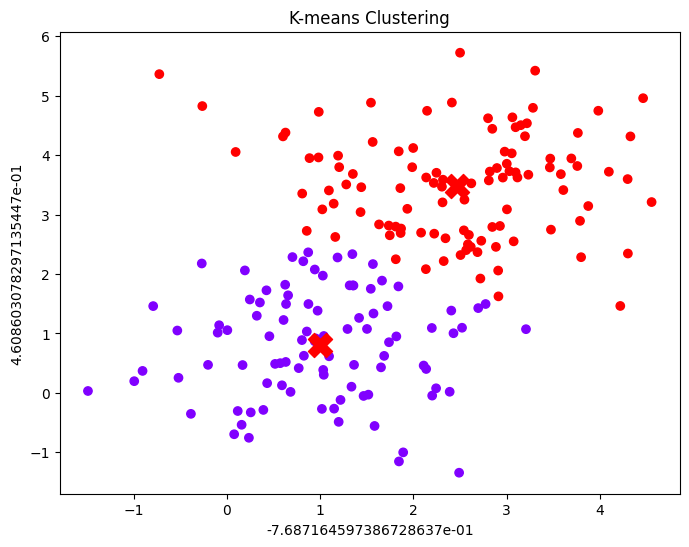

In [4]:
X = data_2d.select_dtypes(include=[np.number])
kmeans = KMeans(n_clusters=2, random_state=42)
data_2d['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data_2d['Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-means Clustering')
plt.show()

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(mnist)
pca = PCA(n_components=2)
reduced_mnist = pca.fit_transform(df_scaled)
df = pd.DataFrame(data = reduced_mnist, columns = ['PC' + str(x) for x in range(1, len(mnist.columns[:2])+1)])
display(df)

,PC1,PC2
0,4.961665,-12.440025
1,-6.930805,-5.874686
2,8.580068,-0.359083
3,1.127156,6.574696
4,-7.587899,-5.584949
...,...,...
494,8.561085,-1.858110
495,-3.372734,7.390969
496,-6.224132,0.273556
497,0.393459,-0.373911


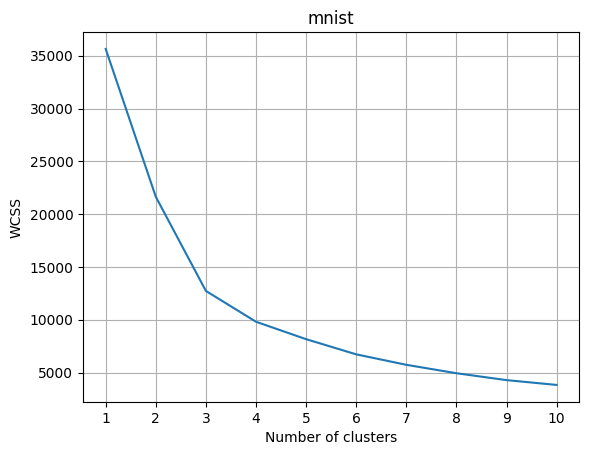

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('mnist')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\oishe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


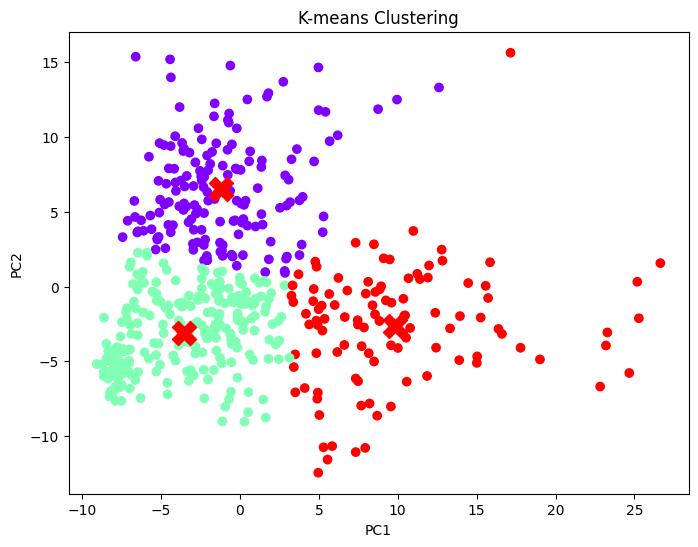

In [7]:
X = df.select_dtypes(include=[np.number])
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-means Clustering')
plt.show()